In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = np.random.normal(loc = 1,scale = 1, size = 10000)

In [24]:
true_sd = 1
prior_sd = 2
prior_mean = 0
def generate_curves(mu, sd):
    ''' 
    Generates curves from normal distribution
    '''
    curves = []
    markers = []
    try:
        mu[0]
    except:
        mu = [mu]
    
    for m in mu:
        this_curve = np.linspace(-5,5,1000)
        this_curve = (1/(np.sqrt(2*np.pi)*sd))*np.exp((-0.5)*((this_curve-m)/sd)**2)
        curves.append(this_curve)
    
    return np.linspace(-5,5,1000), curves

def calculate_posterior(dat):
    '''
    Returns mean and sd of posterior
    '''
    dat_mean = np.mean(dat)
    n        = len(dat)

    precision = 1/(prior_sd**2) + n*(1/(true_sd**2))
    mean = (n*dat_mean*(1/(true_sd**2)) + prior_mean*(prior_sd**2))/precision

    return mean, np.sqrt(1/precision)

In [25]:
np.random.randint(0,5)

0

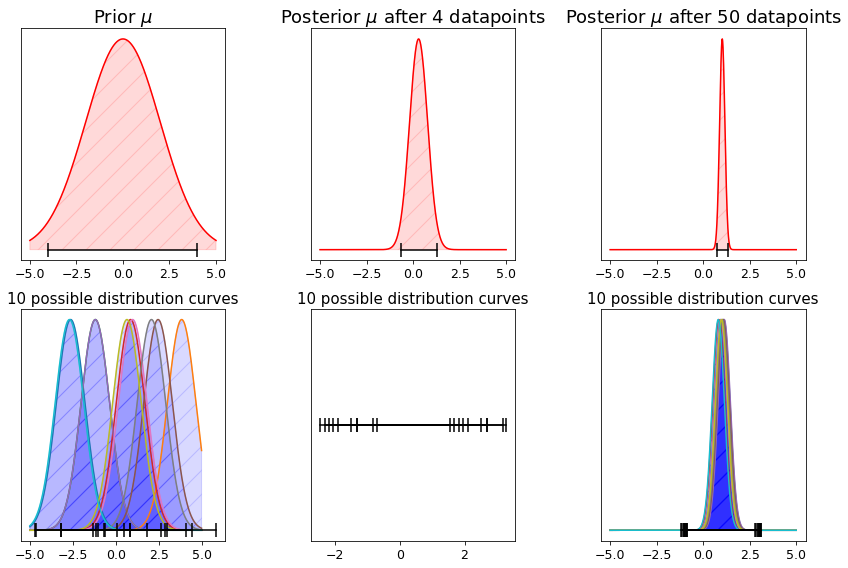

In [26]:
np.random.seed(123244)
title_fontsize = 18

fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

# Data for ax1
x, post1 = generate_curves(prior_mean, prior_sd)
ax1.plot(x, post1[0], color = 'red')
ax1.yaxis.set_visible(False)
ax1.set_title('Prior $\mu$', fontsize = title_fontsize)

ax1.plot([prior_mean - 2*prior_sd, prior_mean + 2*prior_sd], [0,0], color = 'black', marker = "|", markersize = 14, markeredgewidth=1.5)

ax1.fill_between(x,post1[0], color='red',alpha=0.15, hatch = '/')

# Data for ax2
x, post2 = generate_curves(*calculate_posterior(data[:4]))
ax2.plot(x, post2[0], color = 'red')
ax2.yaxis.set_visible(False)
ax2.set_title('Posterior $\mu$ after 4 datapoints', fontsize = title_fontsize)

ax2.plot([calculate_posterior(data[:4])[0] - 2*calculate_posterior(data[:4])[1], 
          calculate_posterior(data[:4])[0] + 2*calculate_posterior(data[:4])[1]], [0,0], color = 'black', marker = "|", markersize = 14, markeredgewidth=1.5)

ax2.fill_between(x,post2[0], color='red',alpha=0.15, hatch = '/')

# Data for ax3
x, post3 = generate_curves(*calculate_posterior(data[:50]))
ax3.plot(x, post3[0], color = 'red')
ax3.yaxis.set_visible(False)
ax3.set_title('Posterior $\mu$ after 50 datapoints', fontsize = title_fontsize)

ax3.plot([calculate_posterior(data[:50])[0] - 2*calculate_posterior(data[:50])[1], 
          calculate_posterior(data[:50])[0] + 2*calculate_posterior(data[:50])[1]], [0,0], color = 'black', marker = "|", markersize = 14, markeredgewidth=1.5)

ax3.fill_between(x,post3[0], color='red',alpha=0.15, hatch = '/')

# Data for ax4
yo = np.random.normal(loc=prior_mean,scale=prior_sd,size=10)
x, curves1 = generate_curves(yo,true_sd)
for curve in curves1:
    ax4.plot(x,curve)
    ax4.fill_between(x,curve, color='blue',alpha=0.15, hatch = '/')
for i in range(10):
    ax4.plot([yo[i] - 2*true_sd, yo[i] + 2*true_sd], [0,0], color = 'black', marker = "|", markersize = 14, markeredgewidth=1.5)

#ax4.yaxis.set_visible(False)
ax4.set_yticks([])
ax4.set_yticklabels([])
ax4.set_title('10 possible distribution curves', fontsize = title_fontsize-3)
#ax4.set_ylabel('Possible data distribution', fontsize=20)

# Data for ax5
m,sd = calculate_posterior(data[:4])
yo=  np.random.normal(loc=m,scale=sd,size=10)
x, curves2 = generate_curves(yo,true_sd)
for curve in curves2:
    ax5.plot(x,curve)
    ax5.fill_between(x,curve, color='blue',alpha=0.15, hatch = '/')
for i in range(10):
    ax5.plot([yo[i] - 2*true_sd, yo[i] + 2*true_sd], [0,0], color = 'black', marker = "|", markersize = 14, markeredgewidth=1.5)


ax5.yaxis.set_visible(False)
ax5.set_title('10 possible distribution curves', fontsize = title_fontsize-3)

# Data for ax6
m,sd = calculate_posterior(data[:50])
yo = np.random.normal(loc=m,scale=sd,size=10)
x, curves3 = generate_curves(yo,true_sd)
for curve in curves3:
    ax6.plot(x,curve)
    ax6.fill_between(x,curve, color='blue',alpha=0.15, hatch = '/')
for i in range(10):
    ax6.plot([yo[i] - 2*true_sd, yo[i] + 2*true_sd], [0,0], color = 'black', marker = "|", markersize = 14, markeredgewidth=1.5)

ax6.yaxis.set_visible(False)
ax6.set_title('10 possible distribution curves', fontsize = title_fontsize-3)


ax1.tick_params(axis='both', labelsize=12.5)
ax2.tick_params(axis='both', labelsize=12.5)
ax3.tick_params(axis='both', labelsize=12.5)
ax4.tick_params(axis='both', labelsize=12.5)
ax5.tick_params(axis='both', labelsize=12.5)
ax6.tick_params(axis='both', labelsize=12.5)

plt.tight_layout()

plt.show()

In [26]:
fig.savefig('/Users/igoradamski/Documents/cambridge/MLMI/dissertation/figs/epistemic_aleatoric', dpi = 300)